<a href="https://colab.research.google.com/github/jerellm/Music-80L/blob/master/Project_1_Rules_Rules_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Rules, Rules, Rules
OK, let's update this *Illiac* thing... See the assignment posting on Canvas for project details.

## Setup
Run this cell to setup the notebook session for sound playback.

In [0]:
# install external libraries for sound playback
from IPython.display import clear_output
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1
clear_output()

If you wish to render music notation, run this cell as well. Otherwise you can skip it.

In [0]:
# install external libraries for music notation
from IPython.display import clear_output
!apt-get -qq install -y lilypond
!apt-get -qq install -y imagemagick
clear_output()

%load_ext abjadext.ipython

Now import libraries into this notebook session.

In [3]:
# imports
import mai
import random

Using TensorFlow backend.


# Template
Below is an empty template to generate a random list. Write your rules on the lines for rules 1, 2, and 3 by replacing the value `True` with your rule expression.

In [47]:
# start with an empty list
my_melody = []

# loop until we have 12 notes
while len(my_melody) < 4:
  
  # generate a random note, picking floats from (60, 108)
  # this makes each note microtonal and shrinks the range of possible notes
  new_note = random.uniform(60,108)
  
  # rule 1, allow for jumps of two octaves
  # The range of notes being chosen from has been adjusted to allow
  # for a maximum of four octaves if the first note was exactly 60.
  rule1 = max(my_melody + [new_note]) - min(my_melody + [new_note]) <= 24
  
  # rule 2, This checks if the list is longer than 1 per spec.
  # This breaks rule 4 from slides 3 because it allows jumps of a major 7th
  rule2 = len(my_melody) < 1 or abs(new_note - my_melody[-1]) > 11

  # rule 3, This checks if the list is at least 2 long. If it is
  # it allows for jumps of a major 3rd.
  rule3 = len(my_melody) < 2 or abs(new_note - my_melody[-2]) <= 4
                
  # if it passes all rules
  if rule1 and rule2 and rule3:  
    
    # append it to the melody
    my_melody += [new_note]

# copy in the short pattern we made to a new melody
melody2 = my_melody.copy()

# reverse that melody
melody2.reverse()

# repetition legitimizes, so repeat the loop we came up with
# concatenate the two melodies in a repetition
for x in range(0, 3):
  my_melody += my_melody + melody2

#print the melody
print(my_melody)

[73.20519143265696, 61.728812614356066, 75.5865680464548, 60.13981303503616, 73.20519143265696, 61.728812614356066, 75.5865680464548, 60.13981303503616, 60.13981303503616, 75.5865680464548, 61.728812614356066, 73.20519143265696, 73.20519143265696, 61.728812614356066, 75.5865680464548, 60.13981303503616, 73.20519143265696, 61.728812614356066, 75.5865680464548, 60.13981303503616, 60.13981303503616, 75.5865680464548, 61.728812614356066, 73.20519143265696, 60.13981303503616, 75.5865680464548, 61.728812614356066, 73.20519143265696, 73.20519143265696, 61.728812614356066, 75.5865680464548, 60.13981303503616, 73.20519143265696, 61.728812614356066, 75.5865680464548, 60.13981303503616, 60.13981303503616, 75.5865680464548, 61.728812614356066, 73.20519143265696, 73.20519143265696, 61.728812614356066, 75.5865680464548, 60.13981303503616, 73.20519143265696, 61.728812614356066, 75.5865680464548, 60.13981303503616, 60.13981303503616, 75.5865680464548, 61.728812614356066, 73.20519143265696, 60.13981303

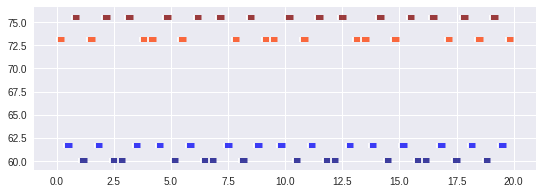

In [48]:
# let's plot it
mai.make_music_plot(my_melody)

In [49]:
# let's hear it
mai.make_music(my_melody, pgm=89)

This last cell only works if you ran the notation setup cell above.

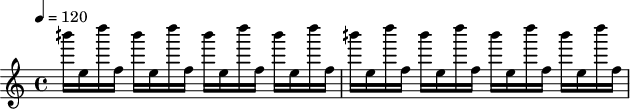

In [13]:
# let's notate it
mai.make_music_notation(my_melody, durs=0.125, tempo=120)